In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle

import numpy as np
import pandas as pd

import settings as conf
import metadata

In [3]:
output_dir = os.path.join(conf.DELIVERABLES_DIR, 'roc_validation', 'classifier_tables', 't2d')
os.makedirs(output_dir, exist_ok=True)
display(output_dir)

'/mnt/phenomexcan_base/deliverables/roc_validation/classifier_tables/t2d'

# Load gene mappings

In [4]:
with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-0.pkl'), 'rb') as f:
    genes_mapping_0 = pickle.load(f)

with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-1.pkl'), 'rb') as f:
    genes_mapping_1 = pickle.load(f)

# Load T2D genes

In [5]:
t2d_genes_filename = os.path.join(output_dir, 't2d_genes.pkl.xz')
display(t2d_genes_filename)

'/mnt/phenomexcan_base/deliverables/roc_validation/classifier_tables/t2d/t2d_genes.pkl.xz'

In [6]:
all_t2d_genes = pd.read_pickle(t2d_genes_filename)

In [7]:
all_t2d_genes.shape

(76, 3)

In [8]:
all_t2d_genes.head()

,gene_id,gene_name,type
0,ENSG00000006071,ABCC8,causal
1,ENSG00000167772,ANGPTL4,causal
2,ENSG00000154122,ANKH,causal
3,ENSG00000130203,APOE,causal
4,ENSG00000111276,CDKN1B,causal


# Load S-MultiXcan results

In [9]:
smultixcan_pvalues_file = os.path.join(conf.GENE_ASSOC_DIR, f'smultixcan-mashr-pvalues.pkl.xz')
display(smultixcan_pvalues_file)

'/mnt/phenomexcan_base/gene_assoc/smultixcan-mashr-pvalues.pkl.xz'

In [10]:
smultixcan_gene_associations = pd.read_pickle(smultixcan_pvalues_file)

In [11]:
smultixcan_gene_associations.shape

(22515, 4091)

In [12]:
smultixcan_gene_associations.head(5)

,20096_1-Size_of_red_wine_glass_drunk_small_125ml,2345-Ever_had_bowel_cancer_screening,N49-Diagnoses_main_ICD10_N49_Inflammatory_disorders_of_male_genital_organs_not_elsewhere_classified,100011_raw-Iron,5221-Index_of_best_refractometry_result_right,20003_1141150624-Treatmentmedication_code_zomig_25mg_tablet,S69-Diagnoses_main_ICD10_S69_Other_and_unspecified_injuries_of_wrist_and_hand,20024_1136-Job_code_deduced_Information_and_communication_technology_managers,20002_1385-Noncancer_illness_code_selfreported_allergy_or_anaphylactic_reaction_to_food,G6_SLEEPAPNO-Sleep_apnoea,...,Astle_et_al_2016_Sum_basophil_neutrophil_counts,RA_OKADA_TRANS_ETHNIC,pgc.scz2,PGC_ADHD_EUR_2017,MAGIC_FastingGlucose,Astle_et_al_2016_Red_blood_cell_count,SSGAC_Depressive_Symptoms,BCAC_ER_positive_BreastCancer_EUR,IBD.EUR.Inflammatory_Bowel_Disease,Astle_et_al_2016_High_light_scatter_reticulocyte_count
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,0.865429,0.918314,0.810683,0.374671,0.189032,0.140981,0.467741,0.129427,0.193680,0.285479,...,0.416210,0.782554,0.609467,0.980281,0.666504,0.409761,0.713310,0.168319,0.460244,0.765506
ENSG00000000457,0.174192,0.064765,0.889194,0.896938,0.448596,0.269602,0.540261,0.068405,0.041813,0.313427,...,0.149360,0.512603,0.010907,0.228982,0.607081,0.812484,0.678749,0.918971,0.311187,0.344574
ENSG00000000460,0.879969,0.240715,0.238228,0.567555,0.921320,0.825036,0.782230,0.644525,0.392273,0.840014,...,0.503520,0.764147,0.587969,0.301460,0.629621,0.486664,0.736509,0.933600,0.000477,0.321223
ENSG00000000938,0.192670,0.400054,0.114353,0.470700,0.889202,0.000011,0.899764,0.212352,0.829671,0.372348,...,0.899212,0.961678,0.059247,0.588855,0.898525,0.135045,0.954998,0.088220,0.176497,0.304281
ENSG00000000971,0.180632,0.793060,0.490585,0.088752,0.744531,0.949639,0.253817,0.377408,0.971655,0.070266,...,0.390618,0.093824,0.020391,0.109883,0.870551,0.995450,0.002660,0.421588,0.656851,0.868416


## Unstacked set of S-MultiXcan results

In [13]:
smultixcan_results = smultixcan_gene_associations.rename_axis('trait', axis=1).unstack().rename('pvalue').dropna().reset_index()

In [14]:
smultixcan_results.shape

(91055810, 3)

In [15]:
smultixcan_results.head()

,trait,gene_name,pvalue
0,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000000419,0.865429
1,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000000457,0.174192
2,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000000460,0.879969
3,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000000938,0.192670
4,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000000971,0.180632


In [16]:
del smultixcan_gene_associations

# Create dataframe with selected genes results

In [17]:
all_gene_results = []

## Causal genes

In [18]:
tmp_df = smultixcan_results.loc[
    smultixcan_results['gene_name'].isin(all_t2d_genes[all_t2d_genes['type'] == 'causal']['gene_id'])
]
tmp_df = tmp_df.assign(gene_type='causal')

In [19]:
tmp_df.shape

(163640, 4)

In [20]:
all_gene_results.append(tmp_df)

## Strong genes

In [21]:
tmp_df = smultixcan_results.loc[
    smultixcan_results['gene_name'].isin(all_t2d_genes[all_t2d_genes['type'] == 'strong']['gene_id'])
]
tmp_df = tmp_df.assign(gene_type='strong')

In [22]:
tmp_df.shape

(69547, 4)

In [23]:
all_gene_results.append(tmp_df)

## Moderate genes

In [24]:
tmp_df = smultixcan_results.loc[
    smultixcan_results['gene_name'].isin(all_t2d_genes[all_t2d_genes['type'] == 'moderate']['gene_id'])
]
tmp_df = tmp_df.assign(gene_type='moderate')

In [25]:
tmp_df.shape

(77729, 4)

In [26]:
all_gene_results.append(tmp_df)

## Possible genes

In [27]:
tmp_df = smultixcan_results.loc[
    smultixcan_results['gene_name'].isin(all_t2d_genes[all_t2d_genes['type'] == 'possible']['gene_id'])
]
tmp_df = tmp_df.assign(gene_type='possible')

In [28]:
tmp_df.shape

(0, 4)

In [29]:
all_gene_results.append(tmp_df)

## Weak genes

In [30]:
tmp_df = smultixcan_results.loc[
    smultixcan_results['gene_name'].isin(all_t2d_genes[all_t2d_genes['type'] == 'weak']['gene_id'])
]
tmp_df = tmp_df.assign(gene_type='weak')

In [31]:
tmp_df.shape

(0, 4)

In [32]:
all_gene_results.append(tmp_df)

## Related traits genes

In [33]:
tmp_df = smultixcan_results.loc[
    smultixcan_results['gene_name'].isin(all_t2d_genes[all_t2d_genes['type'] == 'related_traits']['gene_id'])
]
tmp_df = tmp_df.assign(gene_type='related_traits')

In [34]:
tmp_df.shape

(0, 4)

In [35]:
all_gene_results.append(tmp_df)

## Combine all

In [36]:
all_gene_results_df = pd.concat(all_gene_results, ignore_index=True)

In [37]:
all_gene_results_df = all_gene_results_df.rename(columns={'gene_name': 'gene_id'})

In [38]:
all_gene_results_df.shape

(310916, 4)

In [39]:
all_gene_results_df = all_gene_results_df.assign(gene_name=all_gene_results_df['gene_id'].replace(genes_mapping_0))

In [40]:
all_gene_results_df = all_gene_results_df[['trait', 'gene_id', 'gene_name', 'gene_type', 'pvalue']]

In [41]:
all_gene_results_df.head()

,trait,gene_id,gene_name,gene_type,pvalue
0,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000006071,ABCC8,causal,0.483218
1,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000010310,GIPR,causal,0.440367
2,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000060749,QSER1,causal,0.530133
3,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000075035,WSCD2,causal,0.512875
4,20096_1-Size_of_red_wine_glass_drunk_small_125ml,ENSG00000084734,GCKR,causal,0.499267


## Save

In [42]:
# sort by pvalue
all_gene_results_df = all_gene_results_df.sort_values('pvalue')

In [43]:
os.makedirs(conf.ANALYSES_DIR, exist_ok=True)

In [44]:
filepath = os.path.join(conf.ANALYSES_DIR, 't2d_gene_associations.tsv.gz')
display(filepath)

'/mnt/phenomexcan_base/analyses/t2d_gene_associations.tsv.gz'

In [45]:
all_gene_results_df.to_csv(filepath, sep='\t', index=False)

# Diabetes traits

In [46]:
diabetes_traits = all_gene_results_df['trait'][
    all_gene_results_df['trait'].str.lower().str.contains('diabetes') | 
    all_gene_results_df['trait'].str.lower().str.contains('t2d')
].unique()

In [47]:
diabetes_traits.shape

(36,)

In [48]:
# show all traits with "diabetes"
list(diabetes_traits)

['2443-Diabetes_diagnosed_by_doctor',
 '6153_1-Medication_for_cholesterol_blood_pressure_diabetes_or_take_exogenous_hormones_Cholesterol_lowering_medication',
 '20002_1220-Noncancer_illness_code_selfreported_diabetes',
 '6177_1-Medication_for_cholesterol_blood_pressure_or_diabetes_Cholesterol_lowering_medication',
 '20110_9-Illnesses_of_mother_Diabetes',
 '20107_9-Illnesses_of_father_Diabetes',
 '2986-Started_insulin_within_one_year_diagnosis_of_diabetes',
 '6153_100-Medication_for_cholesterol_blood_pressure_diabetes_or_take_exogenous_hormones_None_of_the_above',
 '20111_9-Illnesses_of_siblings_Diabetes',
 '6177_100-Medication_for_cholesterol_blood_pressure_or_diabetes_None_of_the_above',
 '2976_raw-Age_diabetes_diagnosed',
 '20002_1223-Noncancer_illness_code_selfreported_type_2_diabetes',
 '6153_3-Medication_for_cholesterol_blood_pressure_diabetes_or_take_exogenous_hormones_Insulin',
 '6153_2-Medication_for_cholesterol_blood_pressure_diabetes_or_take_exogenous_hormones_Blood_pressure_

### Read selected T2D traits

In [49]:
t2d_traits_filename = os.path.join(output_dir, 't2d_traits.pkl.xz')

In [50]:
diabetes_traits = pd.read_pickle(t2d_traits_filename).to_list()

In [51]:
diabetes_traits

['E11-Diagnoses_main_ICD10_E11_Noninsulindependent_diabetes_mellitus',
 '20002_1223-Noncancer_illness_code_selfreported_type_2_diabetes',
 'E14-Diagnoses_main_ICD10_E14_Unspecified_diabetes_mellitus',
 'E4_DM2NOCOMP-Type_2_diabetes_without_complications',
 'E4_DM2OPTH-Type_2_diabetes_with_ophthalmic_complications',
 'E4_DM2-Type_2_diabetes',
 'E4_DM2PERIPH-Type_2_diabetes_with_peripheral_circulatory_complications']

### Get phenotypes description

In [52]:
from entity import Trait

In [53]:
diabetes_traits_desc = {
    t: Trait(full_code=t).description
    for t in diabetes_traits
}

In [54]:
diabetes_traits_desc

{'E11-Diagnoses_main_ICD10_E11_Noninsulindependent_diabetes_mellitus': 'Diagnoses - main ICD10: E11 Non-insulin-dependent diabetes mellitus',
 '20002_1223-Noncancer_illness_code_selfreported_type_2_diabetes': 'Non-cancer illness code, self-reported: type 2 diabetes',
 'E14-Diagnoses_main_ICD10_E14_Unspecified_diabetes_mellitus': 'Diagnoses - main ICD10: E14 Unspecified diabetes mellitus',
 'E4_DM2NOCOMP-Type_2_diabetes_without_complications': 'Type 2 diabetes without complications',
 'E4_DM2OPTH-Type_2_diabetes_with_ophthalmic_complications': 'Type 2 diabetes with ophthalmic complications',
 'E4_DM2-Type_2_diabetes': 'Type 2 diabetes',
 'E4_DM2PERIPH-Type_2_diabetes_with_peripheral_circulatory_complications': 'Type 2 diabetes with peripheral circulatory complications'}

## How many significant genes per trait?

In [55]:
diabetes_results = smultixcan_results[smultixcan_results['trait'].isin(diabetes_traits)]

In [56]:
diabetes_results.shape

(155785, 3)

In [57]:
(0.05 / diabetes_results.shape[0])

3.2095516256378985e-07

In [58]:
diabetes_signif_results = diabetes_results[diabetes_results['pvalue'] < 1e-04]

In [59]:
diabetes_signif_results.shape

(100, 3)

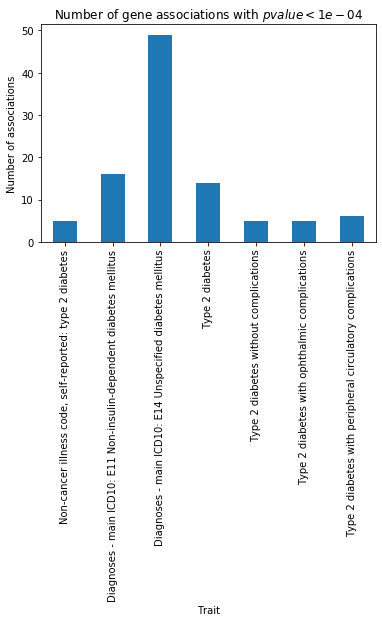

In [65]:
_data = diabetes_signif_results.groupby('trait').count().T.iloc[0].rename(index=diabetes_traits_desc)
_data.index.rename('Trait', inplace=True)

ax = _data.plot(kind='bar')
ax.set_title('Number of gene associations with $pvalue < 1e-04$')
ax.set_ylabel('Number of associations')
display(ax)

# How many T2D genes are we detecting?

In [61]:
diabetes_results = all_gene_results_df[all_gene_results_df['trait'].isin(diabetes_traits)]

In [62]:
diabetes_results.shape

(532, 5)

In [63]:
diabetes_results.head()

,trait,gene_id,gene_name,gene_type,pvalue
174746,20002_1223-Noncancer_illness_code_selfreported...,ENSG00000148737,TCF7L2,strong,3.211915e-15
174744,20002_1223-Noncancer_illness_code_selfreported...,ENSG00000118971,CCND2,strong,2.077713e-09
105650,E14-Diagnoses_main_ICD10_E14_Unspecified_diabe...,ENSG00000109501,WFS1,causal,2.055261e-04
26159,20002_1223-Noncancer_illness_code_selfreported...,ENSG00000275410,HNF1B,causal,3.561569e-04
245606,20002_1223-Noncancer_illness_code_selfreported...,ENSG00000157823,AP3S2,moderate,3.956338e-04


In [64]:
(diabetes_results[diabetes_results['pvalue'] < 1e-3])\
    .drop_duplicates(subset=['gene_id'])['gene_type'].value_counts()

strong      4
causal      2
moderate    1
Name: gene_type, dtype: int64